# LINK Dataset
https://drive.google.com/file/d/1EfKz6KRah0DxHnYwpfJxjQ24w-10qd1N/view

# SUPPORT VECTOR MACHINE
- metode machine learning yang digunakan untuk memisahkan 2 kelompok data dengan mencari garis atau hiperplane(garis untuk memisahkan kedua jenis data berbeda) terbaik diantara keduanya
- max(margin) = jarak tiap data ke hyperplane
- hiperplane(garis untuk memisahkan kedua jenis data berbeda)

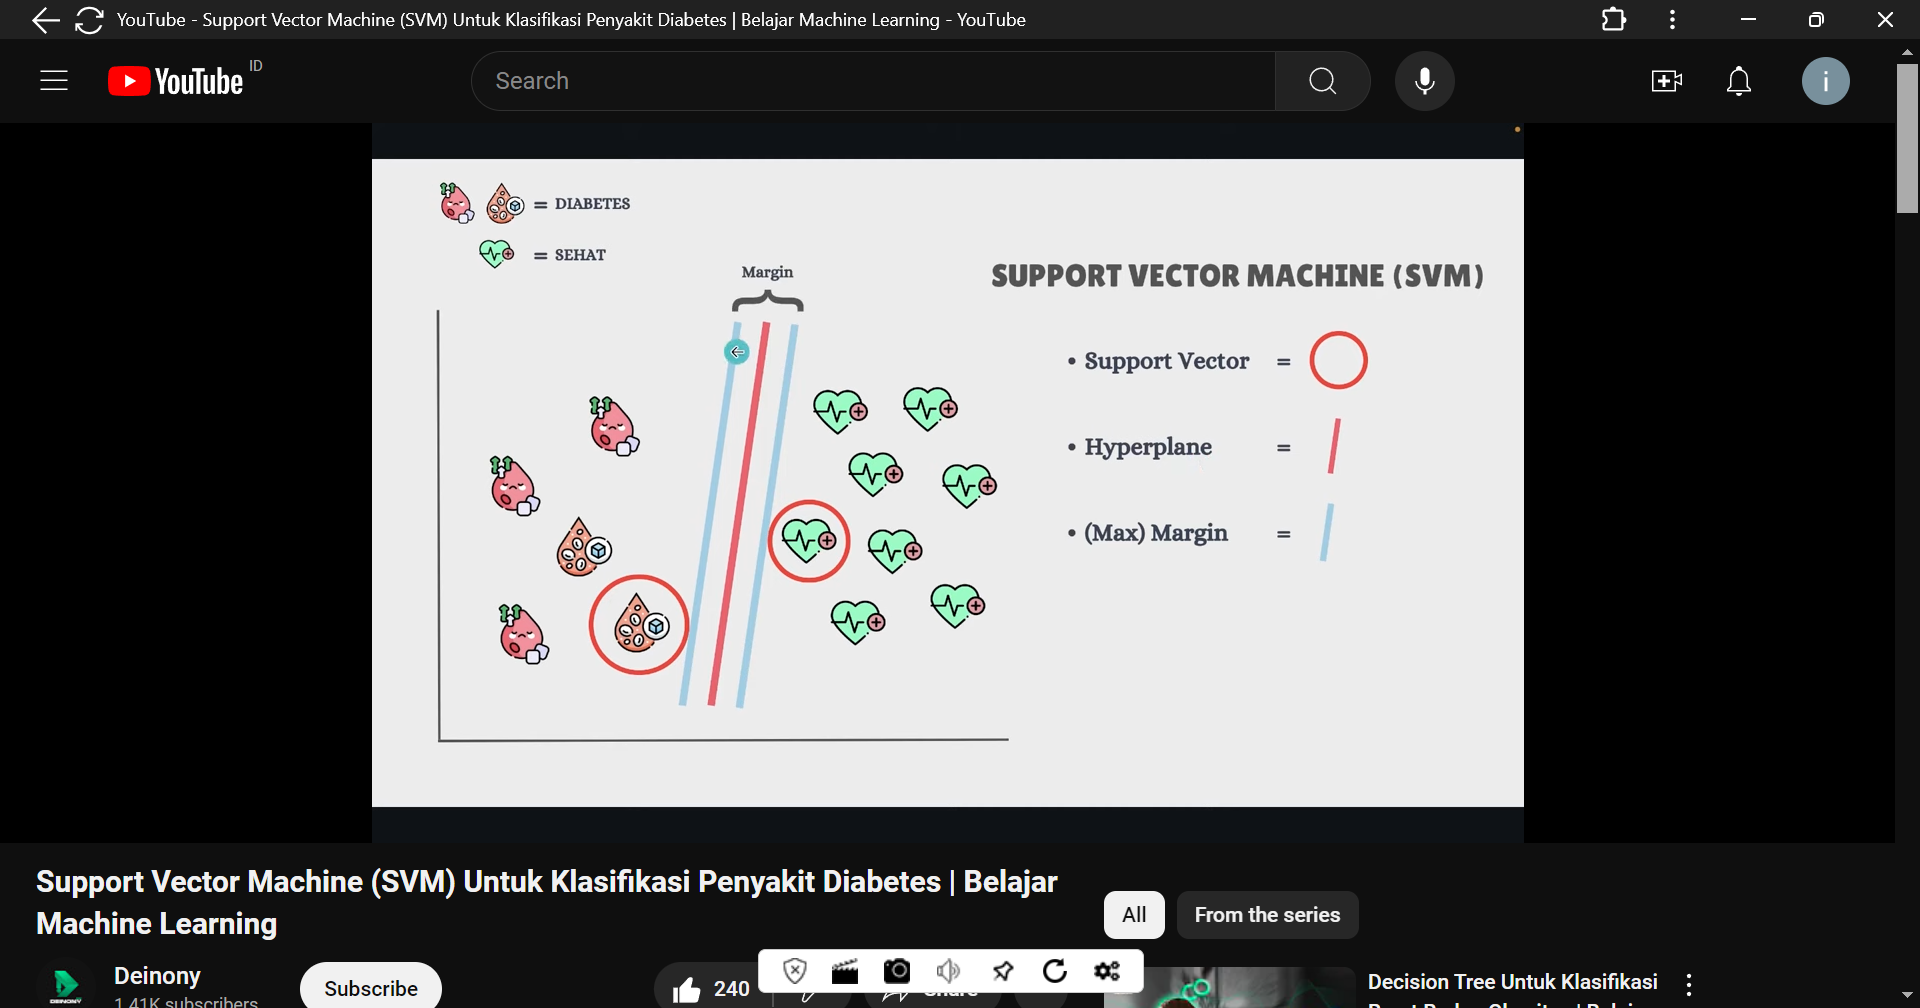

- bagaimana kita memberikan hyperplane kalau data kita tidak linear

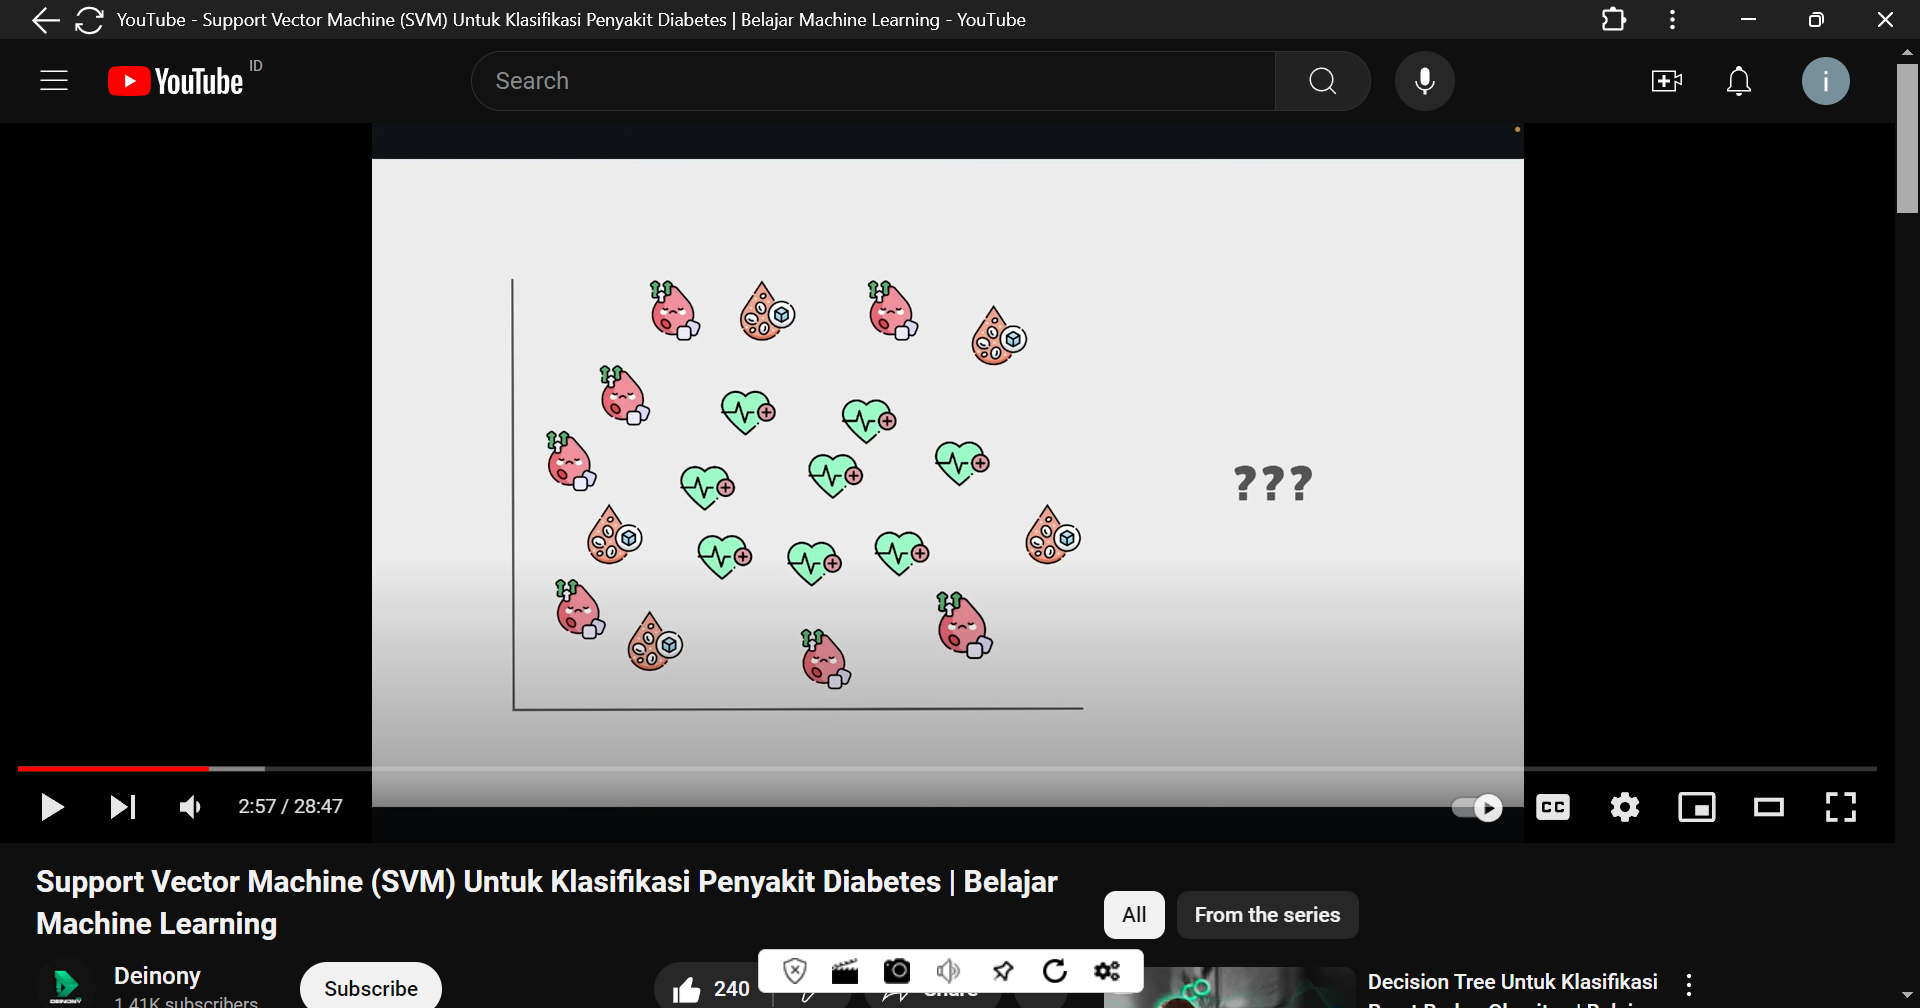

- untuk diatas tidak bisa digunakan karena pemisahan datanya tidak maksimal
- solusinya membuat SVM kernel trick (dimensi baru)
- nanti hyperplane nya akan seperti dibawah ini

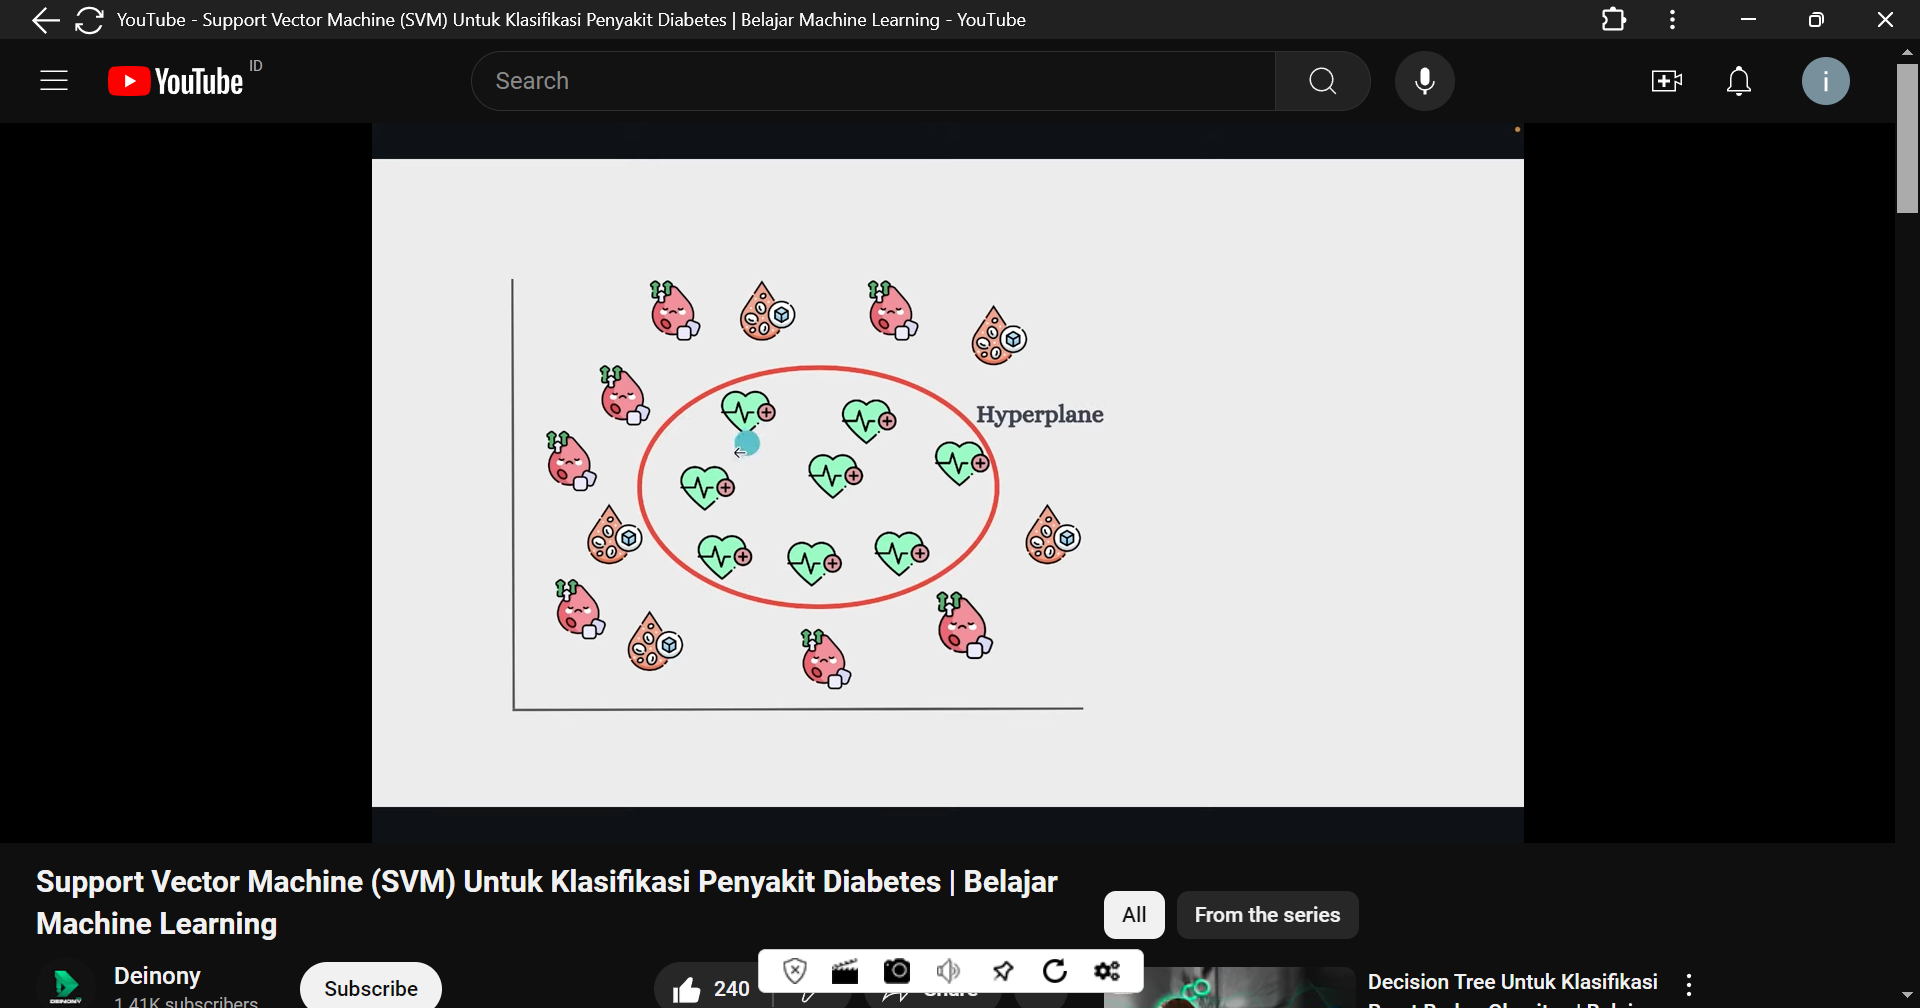

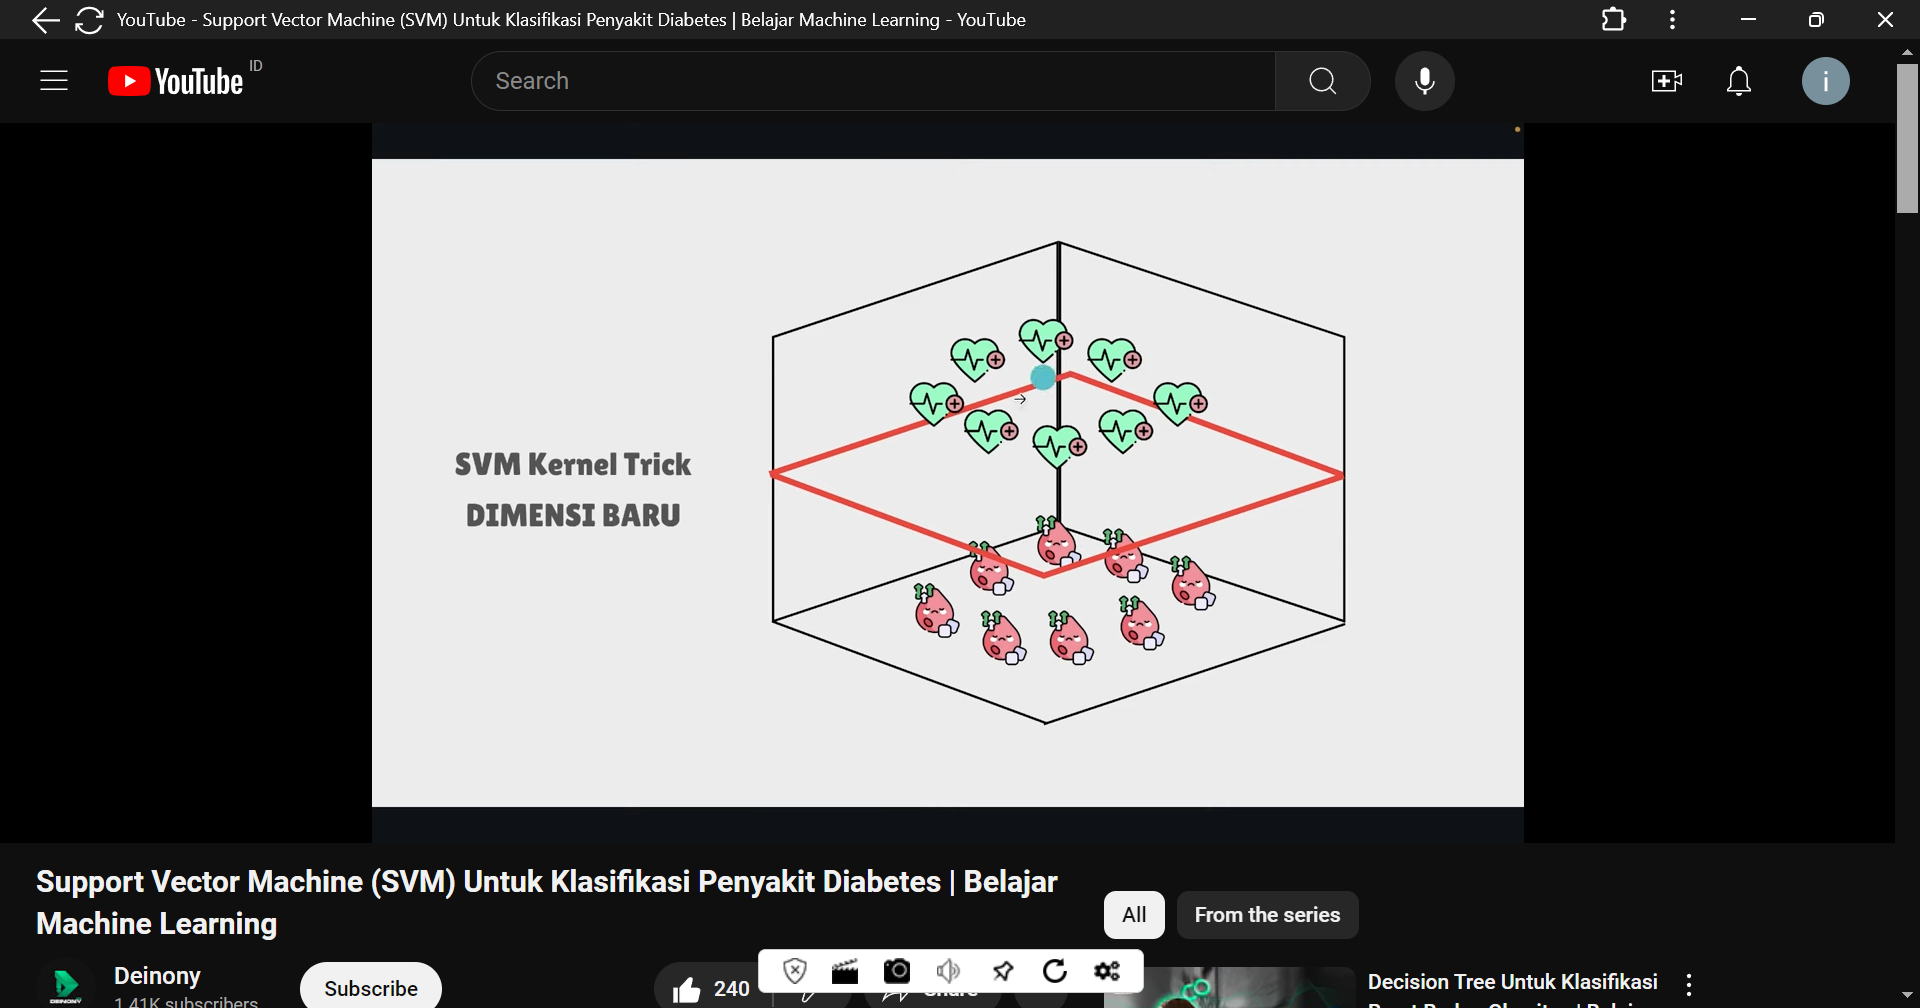

# Import Library

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import Dataset


In [40]:
df = pd.read_csv('Diabetes.csv', index_col=0)
df.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Understanding

In [41]:
# melihat dimensi data
print(' dimensi data', df.shape)

 dimensi data (768, 9)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [43]:
df.columns

Index(['Kehamilan', 'Glukosa', 'Tekanan Darah', 'Ketebalan Kulit', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Umur', 'Hasil'],
      dtype='object')

In [44]:
# deskripsikan ringkasan statistik dengan kolom pilihan
df[['Kehamilan','Tekanan Darah', 'Umur','BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [45]:
df.Hasil.value_counts()

Hasil
0    500
1    268
Name: count, dtype: int64

# Cleaning Data

In [46]:
df.isnull().sum()

Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

- data diatas bersih dari missing value

In [47]:
df.duplicated().sum()

0

- data ini juga tidak memiliki duplikasi data

# EDA   

c:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


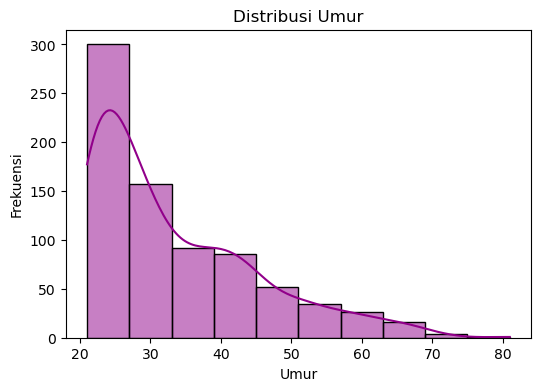

In [48]:
# fekuensi distribusi umur

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Umur',bins=10, kde=True, color='#91008a')
             
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

- data yang kita punya yang mendominasi adalah usia muda antara 20- 30 an

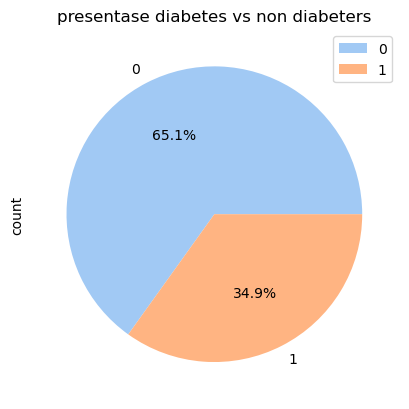

In [49]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('presentase diabetes vs non diabeters')
plt.legend()
plt.show()

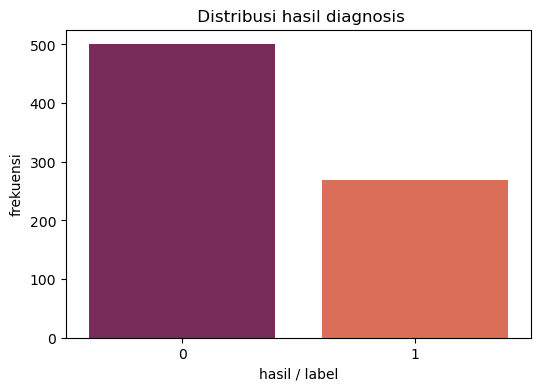

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Hasil', palette='rocket')

plt.title(' Distribusi hasil diagnosis')
plt.xlabel('hasil / label')
plt.ylabel('frekuensi')
plt.show() 

In [51]:
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Heatmap Correlation

<Axes: >

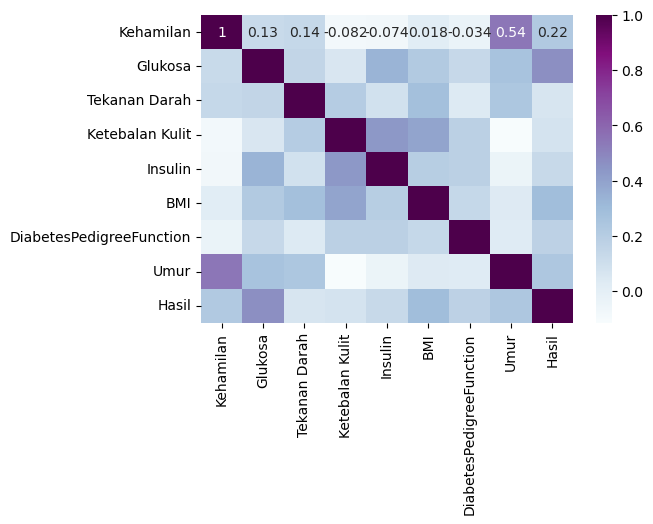

In [52]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='BuPu')

# Preparation Data

In [56]:
X = df.drop(columns='Hasil')
y = df['Hasil']

print('X :',X.shape)
print('y :',y.shape)

X : (768, 8)
y : (768,)


# Scaling data
- menggunakan standarScaler

In [57]:
scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling & Evaluation

In [62]:
# Dengan menggunakan kernel='linear', Anda memberitahu model SVM untuk menggunakan kernel linier,
# yang berarti algoritma akan mencoba menemukan hiperplan linier yang memisahkan kelas-kelas data dalam ruang fitur.
# Kernel linier biasanya lebih cepat dan lebih sederhana untuk dihitung dibandingkan dengan kernel non-linier dan sering
# digunakan sebagai baseline atau untuk data yang linier separable.

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('akurasi SVM : {}'.format(CLF_acc * 100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

akurasi SVM : 75.97402597402598


# Testing

In [63]:
# buat dataframe baru tanpa hasil 

new_data = pd.DataFrame({
    'Kehamilan': [1],
    'Glukosa': [85],
    'Tekanan Darah': [66],
    'Ketebalan Kulit': [29],
    'Insulin': [0],
    'BMI': [26.6],
    'DiabetesPedigreeFunction': [0.351],
    'Umur': [31]
})

new_data = pd.DataFrame(new_data)
new_data

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,1,85,66,29,0,26.6,0.351,31


In [65]:
# scaling dulu data baru nya
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print('diagnosa data baru :', y_pred_new)

diagnosa data baru : [0]


- hasilnya pasien tersebut di diagnosa bukan sebagai penderita diabetes